## Installing the required libraries:

In [5]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


## Load and Explore data:

In [20]:
import os
os.getcwd()
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.python_history',
 '.vscode',
 '3D Objects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop - Shortcut.lnk',
 'Documents',
 'Downloads',
 'dsa',
 'Favorites',
 'html',
 'html tutorial',
 'html2',
 'IdeaProjects',
 'IdeaSnapshots',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'New folder',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{5cec6b67-0d6c-11f0-96bf-e413bbf87333}.TM.blf',
 'NTUSER.DAT{5cec6b67-0d6c-11f0-96bf-e413bbf87333}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{5cec6b67-0d6c-11f0-96bf-e413bbf87333}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'stroke_data_analysis.ipynb',
 'stroke_prediction',
 'survey form',
 'tani.ipynb',
 'tata_data_analysis.ipynb',
 'T

In [21]:
import pandas as pd

# Load the dataset
df=pd.read_csv(r"C:\Users\dell\stroke_prediction\healthcare-dataset-stroke-data .csv")

# Show the first few rows
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data cleaning and preprocessing:

In [22]:
# Check for missing values
df.isnull().sum()

# Fill missing BMI with median value
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Drop 'id' column (since it's not useful for prediction)
df.drop('id', axis=1, inplace=True)

# Remove 'Other' from 'gender' if present
df = df[df['gender'] != 'Other']

# Encode categorical variables
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

# Check the cleaned data
df.head()


C:\Users\dell\AppData\Local\Temp\ipykernel_16924\2934253106.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False
1,1,61.0,0,0,1,0,202.21,28.1,1,False,False,True,False,False,True,False
2,0,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
3,1,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True
4,1,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False


## Exploratory Data Aanalysis(EDA):

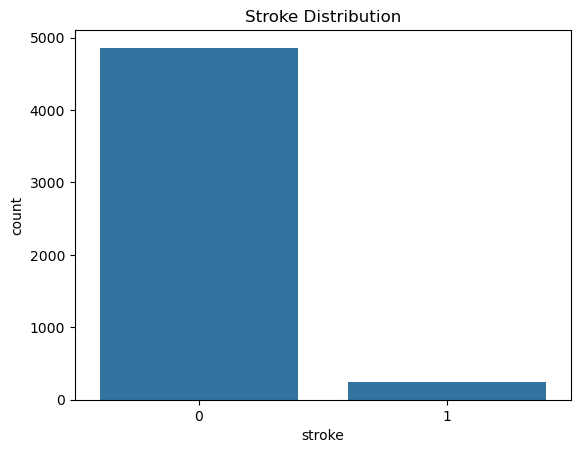

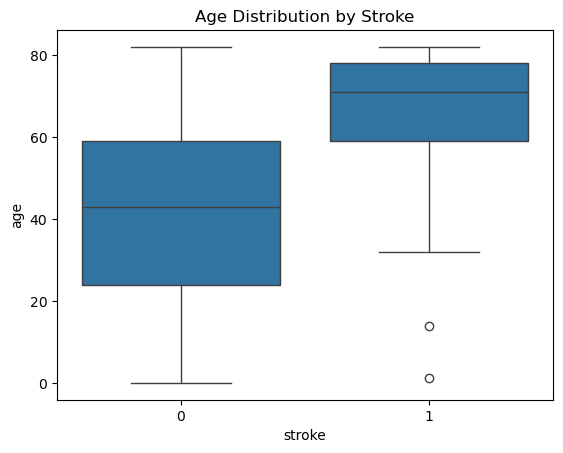

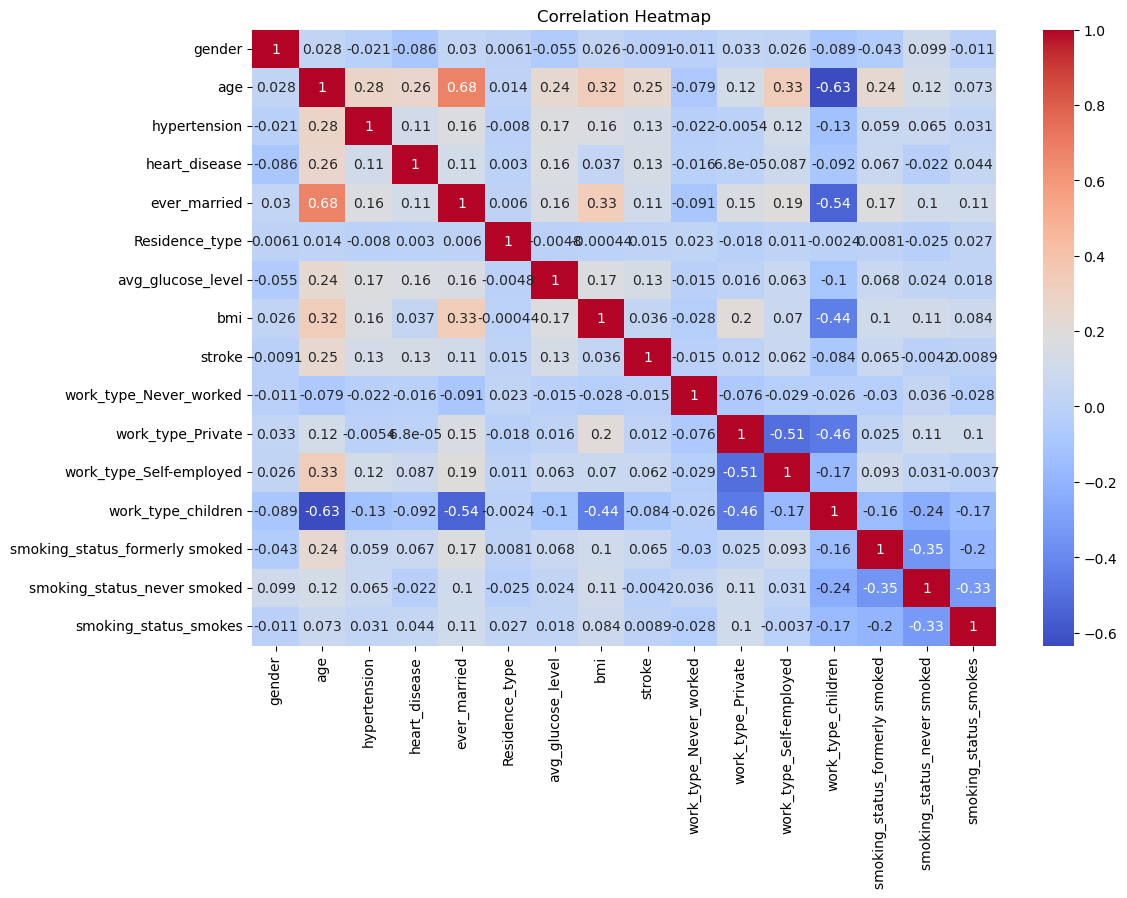

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for stroke distribution
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()

# Boxplot for Age vs Stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Train-test split:

In [25]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (4087, 15), Testing data: (1022, 15)


## Build and Evaluate a Logistic Regression Model:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9393346379647749
Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feature Importance:

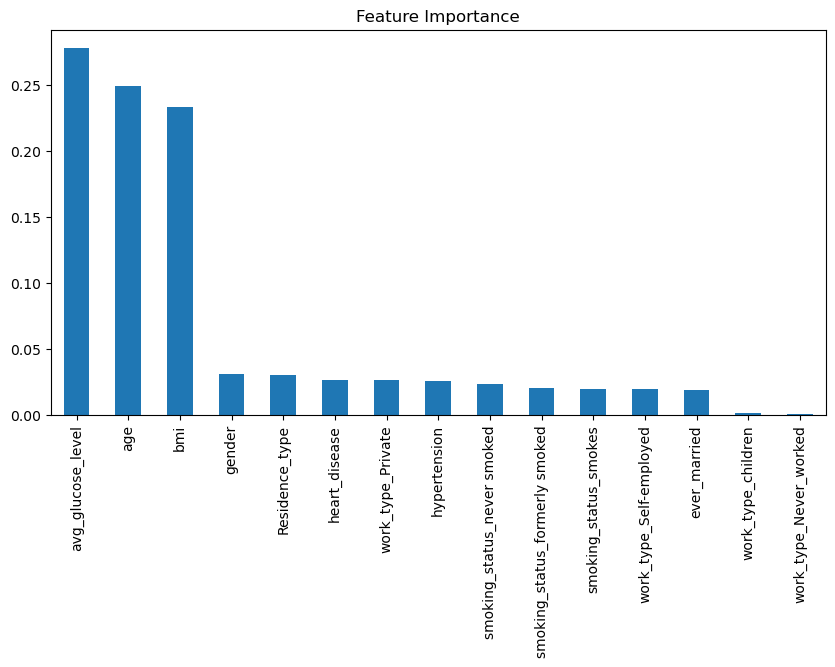

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Feature Importance')
plt.show()
